<a href="https://colab.research.google.com/github/soultanyousif/Neural-network-from-scratch/blob/main/ANN_from_scratch_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

In [ ]:
class Layer:
  def __init__(self) :
    self.input = None
    self.output = None
  def forward(self,input):
    pass
  def backward(self,output_gradient,learning_rate):
    pass

In [ ]:

class Dense(Layer):
  def __init__(self , input_size , output_size): # (self , number of neurons in the input ,number of neurons in the output )
    self.weights=np.random.randn(output_size,input_size)
    self.bias=np.random.randn(output_size,1)
  def forward(self,input):
    self.input=input
    return np.dot(self.weights,self.input)+self.bias # y = W*X + b
  def backward(self, output_gradient, learning_rate):
    weights_gradient = np.dot(output_gradient,self.input.T) # (d Error / d Weights )= (d Error / d Output) *(X.T) =>how much each weight contributed to the error.
    self.weights -= learning_rate * weights_gradient
    self.bias -= learning_rate * output_gradient
    return np.dot(self.weights.T, output_gradient) # (d Error / d X ) = (W.T) * (d Error / d Weights )


In [ ]:
class Activation(Layer): # introduce non linearity to the neural network
  def __init__(self , activation , activation_prime):
    self.activation = activation
    self.activation_prime = activation_prime # the derivative of the activation function
  def forward(self,input):
    self.input = input
    return self.activation(self.input) # Applies the activation function element-wise to the input
  def backward(self, output_gradient, learning_rate):
    return np.multiply (output_gradient ,self.activation_prime(self.input) ) # (d Error / d X) =(d Error / d Output ) * activation_prime

In [ ]:
class Tanh(Activation):
  def __init__(self):
    tanh= lambda x : np.tanh(x)
    tanh_prime= lambda x : 1-np.tanh(x)**2 # => (d tanh(x) / dx) = 1 - tanh(x)**2
    super().__init__(tanh,tanh_prime)

In [ ]:
def mse(y_true,y_pred):
  return np.mean(np.power(y_true-y_pred,2))
def mse_prime(y_true,y_pred):
  return 2*(y_pred-y_true)/y_true.size

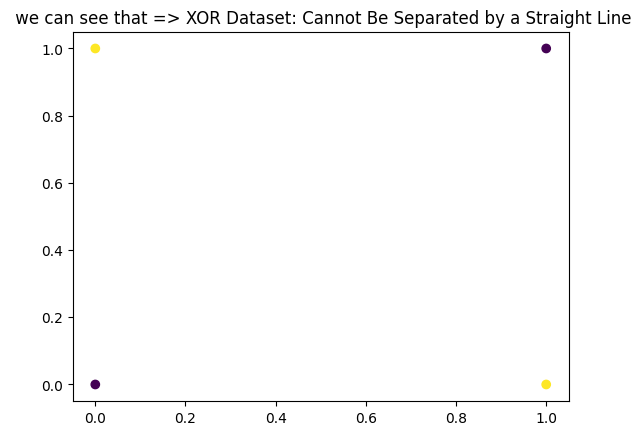

In [ ]:
# XOR problem
import matplotlib.pyplot as plt
x_train=np.array([[0,0],[0,1],[1,0],[1,1]]) #4 training samples
y_train=np.array([0,1,1,0]) #labels corresponding to XOR outputs
plt.scatter(x_train[:,0],x_train[:,1],c=y_train)
plt.title(" we can see that => XOR Dataset: Cannot Be Separated by a Straight Line")
plt.show()

In [ ]:
x=np.array([[0,0],[0,1],[1,0],[1,1]])
y=np.array([0,1,1,0])
x_reshaped=x.reshape(4,2,1)
y_reshaped=y.reshape(4,1,1)

In [ ]:
network = [Dense(2,3),
           Tanh(),
           Dense(3,1),
           Tanh()] #Input (2 features) → Dense(2→3) → Tanh → Dense(3→1) → Tanh → Output (1 value)

epoches=1000
learning_rate=0.1

#train
for e in range(epoches):
  error=0
  for x,y in zip(x_reshaped,y_reshaped):
    #forward
    output=x
    for layer in network:
      output=layer.forward(output)
    #error
    error+=mse(y,output)
    #backword
    grad=mse_prime(y,output)
    for layer in reversed(network):
      grad=layer.backward(grad,learning_rate)
  error/=len(x)
  print(f'{e+1}/{epoches},error={error}')


1/1000,error=1.4228946115208512
2/1000,error=0.9080672455323779
3/1000,error=0.8881388429974705
4/1000,error=0.8611286204036481
5/1000,error=0.825895024031043
6/1000,error=0.785979556423566
7/1000,error=0.7528127470141432
8/1000,error=0.7330474988040945
9/1000,error=0.7201225632888505
10/1000,error=0.7086258187893857
11/1000,error=0.6968308262428999
12/1000,error=0.6841351781300827
13/1000,error=0.6703013694694414
14/1000,error=0.6552866733724301
15/1000,error=0.6392233506949018
16/1000,error=0.6224381751351804
17/1000,error=0.6054555586177097
18/1000,error=0.5889460012476316
19/1000,error=0.5736063611565638
20/1000,error=0.5600032302783768
21/1000,error=0.5484498685888176
22/1000,error=0.5389770980450919
23/1000,error=0.5313983414589514
24/1000,error=0.5254155745515638
25/1000,error=0.520710596226355
26/1000,error=0.5169981214958046
27/1000,error=0.5140452883823974
28/1000,error=0.5116715758550257
29/1000,error=0.5097406853203926
30/1000,error=0.5081508256669938
31/1000,error=0.506826